In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import layers
from tqdm import tqdm
import matplotlib.pyplot as plt
from tqdm import tqdm
import foolbox as fb


tf.compat.v1.enable_eager_execution()
tf.keras.backend.clear_session()  # For easy reset of notebook state.

/Users/florianmerkle/dev/foolbox/foolbox/attacks/brendel_bethge.py:781: NumbaDeprecationWarning: The 'numba.jitclass' decorator has moved to 'numba.experimental.jitclass' to better reflect the experimental nature of the functionality. Please update your imports to accommodate this change and see http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#change-of-jitclass-location for the time frame.
  @jitclass(spec=[])
/Users/florianmerkle/dev/foolbox/foolbox/attacks/brendel_bethge.py:1364: NumbaDeprecationWarning: The 'numba.jitclass' decorator has moved to 'numba.experimental.jitclass' to better reflect the experimental nature of the functionality. Please update your imports to accommodate this change and see http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#change-of-jitclass-location for the time frame.
  @jitclass(spec=spec)
/Users/florianmerkle/dev/foolbox/foolbox/attacks/brendel_bethge.py:1560: NumbaDeprecationWarning: The 'numba.jitclass' decorator 

# Prune, Train Attack Pipeline

In [9]:
pgd_success_rates = []
cw_success_rates = []
all_accuracies = []
ITERATIONS = 2
pruning_ratios = [.0, .3, .5, .7, .8, .9, .95, .97, .98, .99]
for j in tqdm(range(ITERATIONS)):
    accuracies = []
    pgd_success_rate = []
    cw_success_rate = []
    for index, pruning_ratio in tqdm(enumerate(pruning_ratios)):
        model = tf.keras.models.load_model('./saved-models/mini-pipeline-CNN-baseline-model')
        for i in range(index + 1):
            if i != index:
                pruned_weights = prune_weights(model, pruning_ratios[i])
                model.set_weights(pruned_weights)
                pruned_weights = prune_conv_layers(pruning_ratio)
                model.set_weights(pruned_weights)
                model = train_model(model, to_convergence=False)
            if i == index:
                print('final pruning and eval')
                pruned_weights = prune_weights(model, pruning_ratios[i])
                model.set_weights(pruned_weights)
                model = train_model(model, to_convergence=True)
                accuracies.append(model.evaluate(x_test, y_test, verbose=0))
                pgd_success_rate.append(pgd_attack(model))
                #cw_success_rate.append(cw2_attack(model))
                
    all_accuracies.append(accuracies)
    pgd_success_rates.append(pgd_success_rate)
    cw_success_rates.append(cw_success_rate)


  0%|          | 0/2 [00:00<?, ?it/s]
0it [00:00, ?it/s]

final pruning and eval
Epoch 1/100
938/938 [==============================] - 17s 18ms/step - loss: 1.7972 - accuracy: 0.6616 - val_loss: 1.7988 - val_accuracy: 0.6601
Epoch 2/100
938/938 [==============================] - 16s 17ms/step - loss: 1.7360 - accuracy: 0.7240 - val_loss: 1.7116 - val_accuracy: 0.7490
Epoch 3/100
938/938 [==============================] - 16s 17ms/step - loss: 1.7112 - accuracy: 0.7491 - val_loss: 1.7039 - val_accuracy: 0.7560
Epoch 4/100
938/938 [==============================] - 16s 17ms/step - loss: 1.7054 - accuracy: 0.7545 - val_loss: 1.7008 - val_accuracy: 0.7583
Epoch 5/100
938/938 [==============================] - 16s 17ms/step - loss: 1.7041 - accuracy: 0.7552 - val_loss: 1.7033 - val_accuracy: 0.7562
Epoch 6/100
938/938 [==============================] - 16s 17ms/step - loss: 1.7018 - accuracy: 0.7581 - val_loss: 1.6958 - val_accuracy: 0.7638
Epoch 7/100
938/938 [==============================] - 16s 17ms/step - loss: 1.6977 - accuracy: 0.7624 - va


1it [03:06, 186.80s/it]

Epoch 1/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7445 - accuracy: 0.7161 - val_loss: 1.6726 - val_accuracy: 0.7897
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 1.6612 - accuracy: 0.8000 - val_loss: 1.6432 - val_accuracy: 0.8177
Epoch 3/5
938/938 [==============================] - 16s 17ms/step - loss: 1.6459 - accuracy: 0.8155 - val_loss: 1.6336 - val_accuracy: 0.8271
Epoch 4/5
938/938 [==============================] - 16s 17ms/step - loss: 1.6371 - accuracy: 0.8238 - val_loss: 1.6369 - val_accuracy: 0.8249
Epoch 5/5
938/938 [==============================] - 16s 17ms/step - loss: 1.6311 - accuracy: 0.8299 - val_loss: 1.6339 - val_accuracy: 0.8266
final pruning and eval
Epoch 1/100
938/938 [==============================] - 16s 17ms/step - loss: 1.6265 - accuracy: 0.8343 - val_loss: 1.6271 - val_accuracy: 0.8343
Epoch 2/100
938/938 [==============================] - 16s 17ms/step - loss: 1.6244 - accuracy: 0.8364 - val_loss: 1.


2it [08:54, 235.22s/it]

Epoch 1/5
938/938 [==============================] - 16s 17ms/step - loss: 1.8127 - accuracy: 0.6460 - val_loss: 1.7991 - val_accuracy: 0.6591
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7134 - accuracy: 0.7481 - val_loss: 1.6627 - val_accuracy: 0.7991
Epoch 3/5
938/938 [==============================] - 16s 17ms/step - loss: 1.6637 - accuracy: 0.7976 - val_loss: 1.6484 - val_accuracy: 0.8124
Epoch 4/5
938/938 [==============================] - 16s 17ms/step - loss: 1.6480 - accuracy: 0.8131 - val_loss: 1.6398 - val_accuracy: 0.8206
Epoch 5/5
938/938 [==============================] - 16s 17ms/step - loss: 1.6410 - accuracy: 0.8206 - val_loss: 1.6309 - val_accuracy: 0.8293
Epoch 1/5
938/938 [==============================] - 16s 17ms/step - loss: 1.6341 - accuracy: 0.8266 - val_loss: 1.6312 - val_accuracy: 0.8298
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 1.6271 - accuracy: 0.8336 - val_loss: 1.6262 - val_accuracy: 0.8337


3it [16:51, 307.61s/it]

Epoch 1/5
938/938 [==============================] - 16s 17ms/step - loss: 1.8352 - accuracy: 0.6269 - val_loss: 1.7653 - val_accuracy: 0.6964
Epoch 2/5
938/938 [==============================] - 15s 16ms/step - loss: 1.7541 - accuracy: 0.7078 - val_loss: 1.7399 - val_accuracy: 0.7209
Epoch 3/5
938/938 [==============================] - 15s 16ms/step - loss: 1.7386 - accuracy: 0.7223 - val_loss: 1.7216 - val_accuracy: 0.7397
Epoch 4/5
938/938 [==============================] - 15s 16ms/step - loss: 1.7256 - accuracy: 0.7348 - val_loss: 1.7190 - val_accuracy: 0.7415
Epoch 5/5
938/938 [==============================] - 15s 16ms/step - loss: 1.7193 - accuracy: 0.7410 - val_loss: 1.7182 - val_accuracy: 0.7409
Epoch 1/5
938/938 [==============================] - 15s 16ms/step - loss: 1.7144 - accuracy: 0.7456 - val_loss: 1.6688 - val_accuracy: 0.7913
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 1.6610 - accuracy: 0.8009 - val_loss: 1.6414 - val_accuracy: 0.8203


4it [26:34, 390.21s/it]

Epoch 1/5
938/938 [==============================] - 16s 17ms/step - loss: 1.9336 - accuracy: 0.5246 - val_loss: 1.8559 - val_accuracy: 0.6027
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 1.8380 - accuracy: 0.6214 - val_loss: 1.8290 - val_accuracy: 0.6307
Epoch 3/5
938/938 [==============================] - 16s 17ms/step - loss: 1.8234 - accuracy: 0.6353 - val_loss: 1.8156 - val_accuracy: 0.6427
Epoch 4/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7794 - accuracy: 0.6804 - val_loss: 1.7346 - val_accuracy: 0.7263
Epoch 5/5
938/938 [==============================] - 15s 16ms/step - loss: 1.7312 - accuracy: 0.7294 - val_loss: 1.7310 - val_accuracy: 0.7297
Epoch 1/5
938/938 [==============================] - 15s 16ms/step - loss: 1.7347 - accuracy: 0.7263 - val_loss: 1.7218 - val_accuracy: 0.7388
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7197 - accuracy: 0.7404 - val_loss: 1.7166 - val_accuracy: 0.7427


5it [39:47, 511.01s/it]

Epoch 1/5
938/938 [==============================] - 16s 17ms/step - loss: 1.9094 - accuracy: 0.5496 - val_loss: 1.8354 - val_accuracy: 0.6250
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7955 - accuracy: 0.6650 - val_loss: 1.7670 - val_accuracy: 0.6944
Epoch 3/5
938/938 [==============================] - 15s 16ms/step - loss: 1.7478 - accuracy: 0.7137 - val_loss: 1.6904 - val_accuracy: 0.7719
Epoch 4/5
938/938 [==============================] - 15s 16ms/step - loss: 1.6733 - accuracy: 0.7885 - val_loss: 1.6621 - val_accuracy: 0.7999
Epoch 5/5
938/938 [==============================] - 15s 16ms/step - loss: 1.6575 - accuracy: 0.8038 - val_loss: 1.6480 - val_accuracy: 0.8153
Epoch 1/5
938/938 [==============================] - 15s 16ms/step - loss: 1.6767 - accuracy: 0.7854 - val_loss: 1.6560 - val_accuracy: 0.8055
Epoch 2/5
938/938 [==============================] - 15s 16ms/step - loss: 1.6496 - accuracy: 0.8117 - val_loss: 1.6444 - val_accuracy: 0.8166

938/938 [==============================] - 16s 17ms/step - loss: 1.5184 - accuracy: 0.9444 - val_loss: 1.5203 - val_accuracy: 0.9431
Epoch 33/100
938/938 [==============================] - 16s 17ms/step - loss: 1.5179 - accuracy: 0.9448 - val_loss: 1.5177 - val_accuracy: 0.9436
Epoch 34/100
938/938 [==============================] - 16s 17ms/step - loss: 1.5187 - accuracy: 0.9440 - val_loss: 1.5170 - val_accuracy: 0.9455



6it [55:22, 638.30s/it]

Epoch 1/5
938/938 [==============================] - 16s 17ms/step - loss: 1.9963 - accuracy: 0.4616 - val_loss: 1.9299 - val_accuracy: 0.5280
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 1.8911 - accuracy: 0.5684 - val_loss: 1.8004 - val_accuracy: 0.6610
Epoch 3/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7865 - accuracy: 0.6744 - val_loss: 1.7605 - val_accuracy: 0.7004
Epoch 4/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7584 - accuracy: 0.7017 - val_loss: 1.7429 - val_accuracy: 0.7182
Epoch 5/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7475 - accuracy: 0.7131 - val_loss: 1.7370 - val_accuracy: 0.7242
Epoch 1/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7559 - accuracy: 0.7048 - val_loss: 1.7399 - val_accuracy: 0.7193
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7382 - accuracy: 0.7224 - val_loss: 1.7332 - val_accuracy: 0.7276


7it [1:10:03, 600.54s/it]
 50%|█████     | 1/2 [1:10:03<1:10:03, 4203.77s/it]
0it [00:00, ?it/s]

final pruning and eval
Epoch 1/100
938/938 [==============================] - 16s 17ms/step - loss: 1.7530 - accuracy: 0.7068 - val_loss: 1.7190 - val_accuracy: 0.7421
Epoch 2/100
938/938 [==============================] - 16s 17ms/step - loss: 1.6698 - accuracy: 0.7917 - val_loss: 1.6503 - val_accuracy: 0.8115
Epoch 3/100
938/938 [==============================] - 16s 17ms/step - loss: 1.6454 - accuracy: 0.8161 - val_loss: 1.6359 - val_accuracy: 0.8258
Epoch 4/100
938/938 [==============================] - 16s 17ms/step - loss: 1.6348 - accuracy: 0.8260 - val_loss: 1.6252 - val_accuracy: 0.8353
Epoch 5/100
938/938 [==============================] - 16s 17ms/step - loss: 1.6313 - accuracy: 0.8296 - val_loss: 1.6227 - val_accuracy: 0.8383
Epoch 6/100
938/938 [==============================] - 16s 17ms/step - loss: 1.6273 - accuracy: 0.8333 - val_loss: 1.6222 - val_accuracy: 0.8399
Epoch 7/100
938/938 [==============================] - 16s 17ms/step - loss: 1.6237 - accuracy: 0.8371 - va


1it [08:34, 514.10s/it]

Epoch 1/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7546 - accuracy: 0.7049 - val_loss: 1.7172 - val_accuracy: 0.7423
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7173 - accuracy: 0.7428 - val_loss: 1.7087 - val_accuracy: 0.7510
Epoch 3/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7106 - accuracy: 0.7497 - val_loss: 1.7075 - val_accuracy: 0.7521
Epoch 4/5
938/938 [==============================] - 16s 17ms/step - loss: 1.6651 - accuracy: 0.7970 - val_loss: 1.6380 - val_accuracy: 0.8243
Epoch 5/5
938/938 [==============================] - 16s 17ms/step - loss: 1.6378 - accuracy: 0.8237 - val_loss: 1.6308 - val_accuracy: 0.8298
final pruning and eval
Epoch 1/100
938/938 [==============================] - 16s 17ms/step - loss: 1.6332 - accuracy: 0.8278 - val_loss: 1.6235 - val_accuracy: 0.8373
Epoch 2/100
938/938 [==============================] - 16s 17ms/step - loss: 1.6258 - accuracy: 0.8352 - val_loss: 1.


2it [14:48, 472.34s/it]

Epoch 1/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7912 - accuracy: 0.6679 - val_loss: 1.7263 - val_accuracy: 0.7342
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7256 - accuracy: 0.7347 - val_loss: 1.7177 - val_accuracy: 0.7423
Epoch 3/5
938/938 [==============================] - 15s 16ms/step - loss: 1.7184 - accuracy: 0.7419 - val_loss: 1.7084 - val_accuracy: 0.7517
Epoch 4/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7128 - accuracy: 0.7471 - val_loss: 1.7073 - val_accuracy: 0.7525
Epoch 5/5
938/938 [==============================] - 15s 16ms/step - loss: 1.6695 - accuracy: 0.7911 - val_loss: 1.6476 - val_accuracy: 0.8142
Epoch 1/5
938/938 [==============================] - 16s 17ms/step - loss: 1.6475 - accuracy: 0.8138 - val_loss: 1.6335 - val_accuracy: 0.8272
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 1.6376 - accuracy: 0.8238 - val_loss: 1.6306 - val_accuracy: 0.8315


3it [20:29, 432.65s/it]

Epoch 1/5
938/938 [==============================] - 16s 17ms/step - loss: 1.8397 - accuracy: 0.6239 - val_loss: 1.7647 - val_accuracy: 0.6965
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7597 - accuracy: 0.7023 - val_loss: 1.7417 - val_accuracy: 0.7211
Epoch 3/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7404 - accuracy: 0.7204 - val_loss: 1.7398 - val_accuracy: 0.7206
Epoch 4/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7302 - accuracy: 0.7305 - val_loss: 1.7196 - val_accuracy: 0.7411
Epoch 5/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7252 - accuracy: 0.7349 - val_loss: 1.7191 - val_accuracy: 0.7420
Epoch 1/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7227 - accuracy: 0.7375 - val_loss: 1.7210 - val_accuracy: 0.7399
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7153 - accuracy: 0.7445 - val_loss: 1.7165 - val_accuracy: 0.7437


4it [30:43, 487.13s/it]

Epoch 1/5
938/938 [==============================] - 15s 16ms/step - loss: 1.9254 - accuracy: 0.5330 - val_loss: 1.8422 - val_accuracy: 0.6173
Epoch 2/5
938/938 [==============================] - 15s 16ms/step - loss: 1.7885 - accuracy: 0.6723 - val_loss: 1.7533 - val_accuracy: 0.7080
Epoch 3/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7444 - accuracy: 0.7164 - val_loss: 1.7425 - val_accuracy: 0.7185
Epoch 4/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7330 - accuracy: 0.7273 - val_loss: 1.7256 - val_accuracy: 0.7342
Epoch 5/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7247 - accuracy: 0.7358 - val_loss: 1.7205 - val_accuracy: 0.7397
Epoch 1/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7314 - accuracy: 0.7288 - val_loss: 1.7152 - val_accuracy: 0.7460
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7190 - accuracy: 0.7411 - val_loss: 1.7179 - val_accuracy: 0.7419


5it [41:36, 536.96s/it]

Epoch 1/5
938/938 [==============================] - 16s 17ms/step - loss: 1.9092 - accuracy: 0.5505 - val_loss: 1.8592 - val_accuracy: 0.5998
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 1.8253 - accuracy: 0.6342 - val_loss: 1.7713 - val_accuracy: 0.6882
Epoch 3/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7600 - accuracy: 0.7006 - val_loss: 1.7530 - val_accuracy: 0.7075
Epoch 4/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7447 - accuracy: 0.7153 - val_loss: 1.7356 - val_accuracy: 0.7237
Epoch 5/5
938/938 [==============================] - 16s 17ms/step - loss: 1.6918 - accuracy: 0.7695 - val_loss: 1.6583 - val_accuracy: 0.8042
Epoch 1/5
938/938 [==============================] - 16s 17ms/step - loss: 1.6894 - accuracy: 0.7725 - val_loss: 1.6602 - val_accuracy: 0.8023
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 1.6587 - accuracy: 0.8028 - val_loss: 1.6505 - val_accuracy: 0.8105


6it [52:05, 564.68s/it]

Epoch 1/5
938/938 [==============================] - 16s 17ms/step - loss: 2.0111 - accuracy: 0.4465 - val_loss: 1.8924 - val_accuracy: 0.5682
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 1.8629 - accuracy: 0.5975 - val_loss: 1.8128 - val_accuracy: 0.6491
Epoch 3/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7894 - accuracy: 0.6721 - val_loss: 1.7885 - val_accuracy: 0.6722
Epoch 4/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7654 - accuracy: 0.6956 - val_loss: 1.7557 - val_accuracy: 0.7069
Epoch 5/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7521 - accuracy: 0.7085 - val_loss: 1.7471 - val_accuracy: 0.7126
Epoch 1/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7928 - accuracy: 0.6684 - val_loss: 1.7585 - val_accuracy: 0.7009
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7505 - accuracy: 0.7103 - val_loss: 1.7459 - val_accuracy: 0.7158

938/938 [==============================] - 16s 17ms/step - loss: 1.5282 - accuracy: 0.9351 - val_loss: 1.5272 - val_accuracy: 0.9359
Epoch 28/100
938/938 [==============================] - 15s 17ms/step - loss: 1.5289 - accuracy: 0.9344 - val_loss: 1.5340 - val_accuracy: 0.9284
Epoch 29/100
938/938 [==============================] - 16s 17ms/step - loss: 1.5288 - accuracy: 0.9341 - val_loss: 1.5302 - val_accuracy: 0.9322
Epoch 30/100
938/938 [==============================] - 15s 16ms/step - loss: 1.5259 - accuracy: 0.9371 - val_loss: 1.5250 - val_accuracy: 0.9370
Epoch 31/100
938/938 [==============================] - 15s 16ms/step - loss: 1.5246 - accuracy: 0.9385 - val_loss: 1.5323 - val_accuracy: 0.9306
Epoch 32/100
938/938 [==============================] - 16s 17ms/step - loss: 1.5260 - accuracy: 0.9364 - val_loss: 1.5271 - val_accuracy: 0.9350
Epoch 33/100
938/938 [==============================] - 15s 16ms/step - loss: 1.5267 - accuracy: 0.9359 - val_loss: 1.5234 - val_accuracy


7it [1:11:00, 608.64s/it]
100%|██████████| 2/2 [2:21:04<00:00, 4232.14s/it]  


In [17]:
avg_success_rates = get_average_success_rates(pgd_success_rates)
avg_accuracies = get_average_accuracies(all_accuracies)


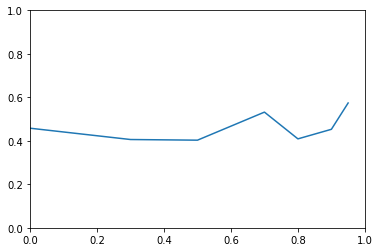

In [20]:

plt.plot(pruning_ratios, avg_success_rates)
plt.axis([0,1,0,1])
#plt.ylabel('some numbers')
plt.show()

# Helper Functions

In [27]:
def train_model(model, to_convergence=True):
    if to_convergence == True:
        callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
        model.fit(
            x=x_train,
            y=y_train,
            batch_size=64,
            epochs=100,
            callbacks=[callback],
            validation_data=(x_test, y_test),
            )
    if to_convergence == False:
        model.fit(
            x=x_train,
            y=y_train,
            batch_size=64,
            epochs=5,
            validation_data=(x_test, y_test),
            )
    return model

def prune_weights(model, pruning_ratio):
    weights = model.get_weights()
    weights_to_prune = model.get_weights()
    for index, weight in enumerate(weights):
        
        if (index == 9) or (index == 12) :
            #print(weight.shape)
            #print(index)
            flat_weights = weight.flatten()
            flat_weights_to_prune = weights_to_prune[index+2].flatten()
            #print (flat_weights_to_prune.shape, flat_weights.shape)
            flat_weights_df = pd.DataFrame(flat_weights)
            flat_weights_to_prune_df = pd.DataFrame(flat_weights_to_prune)
            no_of_weights_to_prune = int(len(flat_weights)*pruning_ratio)
            #print(len(flat_weights))
            #print('no of weights',no_of_weights_to_prune)
            #print('weights to prune shape', flat_weights_to_prune.shape)
            indices_to_delete = flat_weights_df.abs().values.argsort(0)[:no_of_weights_to_prune]
            for idx_to_delete in indices_to_delete:
                flat_weights_to_prune[idx_to_delete] = 0
            dims = weights_to_prune[index+2].shape
            weights_reshaped = flat_weights_to_prune.reshape(dims)
            weights_to_prune[index+2] = weights_reshaped
    #print(weights_to_prune)
    return weights_to_prune

def pgd_attack(model_to_attack):
    fmodel = fb.models.TensorFlowModel(model_to_attack, bounds=(0,1))
    attack = fb.attacks.LinfProjectedGradientDescentAttack()
    adversarials = attack(
        fmodel,
        x,
        y,
        epsilons=[25/255]
    )
    return np.count_nonzero(adversarials[2])/500

def cw2_attack(model_to_attack):
    fmodel = fb.models.TensorFlowModel(model_to_attack, bounds=(0,1))
    attack = fb.attacks.L2CarliniWagnerAttack()
    adversarials = attack(
        fmodel,
        x,
        y,
        #epsilons=[.5]
        epsilons=None
    )
    return np.count_nonzero(adversarials[2])/len(y)

def prune_conv_layers(pruning_ratio):
    layer_to_prune = [0, 3]
    pruned_weights = model.get_weights()
    
    for layer in layer_to_prune:
        converted_weights = convert_from_hwio_to_iohw(model.get_weights()[layer])
        converted_mask = convert_from_hwio_to_iohw(model.get_weights()[layer + 2]).numpy()
        for input_index, input_layer in enumerate(converted_weights):

            for kernel_index, kernel in enumerate(input_layer):
                dims = kernel.shape
                flat_weights = kernel.numpy().flatten()
                flat_masks = converted_mask[input_index][kernel_index].flatten()
                flat_weights_df = pd.DataFrame(flat_weights)
                flat_mask_df = pd.DataFrame(flat_masks)
                no_of_weights_to_prune = int(len(flat_weights)*pruning_ratio)
                #print(no_of_weights_to_prune)
                indices_to_delete = flat_weights_df.abs().values.argsort(0)[:no_of_weights_to_prune]
                for idx_to_delete in indices_to_delete:
                    flat_masks[idx_to_delete] = 0

                converted_mask[input_index][kernel_index] = flat_masks.reshape(dims)
        back_converted_mask = convert_from_iohw_to_hwio(converted_mask)
        pruned_weights[layer+2] = back_converted_mask
    
    return pruned_weights

def convert_from_hwio_to_iohw(weights_nchw):
    return tf.transpose(weights_nchw, [2, 3, 0, 1])



def convert_from_iohw_to_hwio(weights_nhwc):
    return tf.transpose(weights_nhwc, [2, 3, 0, 1])


def get_average_accuracies(all_accuracies):
    acc_per_pruning_rate=[]
    for i in range(len(all_accuracies)):
        for j in range(len(all_accuracies[i])):

            try:
                acc_per_pruning_rate[j].append(all_accuracies[i][j][1])
            except:
                acc_per_pruning_rate.append([])
                acc_per_pruning_rate[j].append(all_accuracies[i][j][1])
    avg_acc_per_pruning_rate = [sum(x)/len(x) for x in acc_per_pruning_rate]; avg_acc_per_pruning_rate
    return avg_acc_per_pruning_rate

def get_average_success_rates(all_success_rates):
    success_per_pruning_rate=[]
    for i in range(len(all_success_rates)):
        for j in range(len(all_success_rates[i])):

            try:
                success_per_pruning_rate[j].append(all_success_rates[i][j])
            except:
                success_per_pruning_rate.append([])
                success_per_pruning_rate[j].append(all_success_rates[i][j])
    avg_success_per_pruning_rate = [sum(x)/len(x) for x in success_per_pruning_rate];avg_success_per_pruning_rate
    return avg_success_per_pruning_rate

# Load Data

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

x = tf.convert_to_tensor(x_train[:500].reshape(500,28*28))
y = tf.convert_to_tensor([y_train[:500]])[0];

# Define Model

In [7]:
weights = {
    # 5x5 conv, 1 input, 6 outputs
    'weights_conv_1': tf.Variable(tf.random.normal([5, 5, 1, 6])),
    # 5x5 conv, 6 inputs, 16 outputs
    'weights_conv_2': tf.Variable(tf.random.normal([5, 5, 6, 16])),
    #5x5 conv as in paper, 16 inputs, 120 outputs
    'weights_conv_3': tf.Variable(tf.random.normal([1, 1, 16, 120])),
    # fully connected, 5*5*16 inputs, 120 outputs
    'weights_dense_1': tf.Variable(tf.random.normal([5*5*16, 120])),
    # fully connected, 120 inputs, 84 outputs
    'weights_dense_2': tf.Variable(tf.random.normal([120, 84])),
    # 84 inputs, 10 outputs (class prediction)
    'weights_dense_3': tf.Variable(tf.random.normal([84, 10])),
}

masks = {
    # 5x5 conv, 1 input, 6 outputs
    'mask_conv_1': tf.Variable(tf.ones([5, 5, 1, 6]), trainable=False),
    # 5x5 conv, 6 inputs, 16 outputs
    'mask_conv_2': tf.Variable(tf.ones([5, 5, 6, 16]), trainable=False),
    #5x5 conv as in paper, 16 inputs, 120 outputs
    'mask_conv_3': tf.Variable(tf.ones([1, 1, 16, 120]), trainable=False),
    # fully connected, 5*5*16 inputs, 120 outputs
    'mask_dense_1': tf.Variable(tf.ones([5*5*16, 120]), trainable=False),
    # fully connected, 120 inputs, 84 outputs
    'mask_dense_2': tf.Variable(tf.ones([120, 84]), trainable=False),
    # 84 inputs, 10 outputs (class prediction)
    'mask_dense_3': tf.Variable(tf.ones([84, 10]), trainable=False),
}

biases = {
    #output depth
    'bias_conv_1': tf.Variable(tf.random.normal([6])),
    'bias_conv_2': tf.Variable(tf.random.normal([16])),
    'bias_dense_1': tf.Variable(tf.random.normal([120])),
    'bias_dense_2': tf.Variable(tf.random.normal([84])),
    'bias_dense_3': tf.Variable(tf.random.normal([10])),
}

#conv2D with bias and relu activation

class CustomConvLayer(layers.Layer):

    def __init__(self, weights, mask, biases, strides, padding='SAME'):
        
        super(CustomConvLayer, self).__init__()
        self.w = weights
        self.m = mask
        self.b = biases
        self.s = strides
        self.p = padding

        
    def call(self, inputs):
        #print('inputs',inputs)
        #print('weights', self.w)
        #print('masks', self.m)
        #print('weights * masks',tf.multiply(self.w, self.m))
        x = tf.nn.conv2d(inputs, tf.multiply(self.w, self.m), strides=[1, self.s, self.s, 1], padding=self.p,)# data_format='NCHW')
        #print('x', x)
        #print('bias', self.b)
        x = tf.nn.bias_add(x, self.b,)# 'NC...')
        #print('x', x)
        return tf.nn.tanh(x)
        

#Average Pooling Layer
class CustomPoolLayer(layers.Layer):
    
    def __init__(self, k=2, padding='valid'):#padding='VALID'):
        super(CustomPoolLayer, self).__init__()
        self.k = k
        self.p = padding
    
    def call(self, inputs):
#        return tf.keras.layers.AveragePooling2D(pool_size=(self.k, self.k), strides=None, padding=self.p, data_format='channels_first')(inputs)
        return tf.nn.avg_pool2d(inputs, ksize=[1, self.k, self.k,1], strides=[1, self.k, self.k, 1], padding=self.p,)# data_format='NCHW')
    
#Dense Layer with Bias
class CustomDenseLayer(layers.Layer):
    
    def __init__(self, weights, mask, bias, activation = 'tanh'):
        super(CustomDenseLayer, self).__init__()
        self.w = weights
        self.b = bias
        self.a = activation
        self.m = mask
        
    def call(self, inputs):
        #print('dense w',self.w)
        #print('dense i',inputs)
        x = tf.matmul(inputs, tf.multiply(self.w, self.m))
        #print('bias ',self.b)
        x = tf.nn.bias_add(x, self.b)
        if self.a == 'tanh':
            return tf.nn.tanh(x)
        if self.a == 'softmax':
            return tf.nn.softmax(x)
        
class CustomConvModel(tf.keras.Model):
    def __init__(self):
        super(CustomConvModel, self).__init__()
        self.conv1 = CustomConvLayer(weights['weights_conv_1'], masks['mask_conv_1'], biases['bias_conv_1'], 1, 'SAME')#'VALID')
        self.maxpool1 = CustomPoolLayer(k=2, padding='SAME')
        self.conv2 = CustomConvLayer(weights['weights_conv_2'], masks['mask_conv_2'], biases['bias_conv_2'], 1, 'VALID')
        self.maxpool2 = CustomPoolLayer(k=2, padding='VALID')
        #self.conv3 = CustomConvLayer(weights['weights_conv_3'], masks['mask_conv_3'], biases['bias_dense_1'], 1, 'VALID')
        self.dense1 = CustomDenseLayer(weights['weights_dense_1'], masks['mask_dense_1'], biases['bias_dense_1'], 'tanh')
        self.dense2 = CustomDenseLayer(weights['weights_dense_2'], masks['mask_dense_2'], biases['bias_dense_2'], 'tanh')
        self.dense3 = CustomDenseLayer(weights['weights_dense_3'], masks['mask_dense_3'], biases['bias_dense_3'], 'softmax')
        
    def call(self, inputs):
        #print('input shape', inputs.shape)
        x = tf.reshape(inputs, shape=[-1,28, 28, 1])
        #print('after reshape',x.shape)
        x = self.conv1(x)
        #print('after conv1', x.shape)
        x = self.maxpool1(x)
        #print('after pool1',x.shape)
        x = self.conv2(x)
        #print('after conv2',x.shape)
        x = self.maxpool2(x)
        #print('yo',x.shape)
        #x = layers.Flatten()(x)
        #print('after pool2',x.shape)
        #x = self.conv3(x)
        
        #print('after conv3',x.shape)
        x = layers.Flatten()(x)
        #print('after flatten',x.shape)
        x = self.dense1(x)
        x = self.dense2(x)
        #print(x.shape)
        x =  self.dense3(x)
        #print(x.shape)
        return x
        

# Compile and Train Model

In [8]:
model = CustomConvModel()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,
              metrics=['accuracy'],
              experimental_run_tf_function=False
              
             )

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.fit(x=x_train,
          y=y_train,
          batch_size=64,
          epochs=10,
          callbacks=[callback],
          validation_data=(x_test, y_test),
         )
model.save('./saved-models/mini-pipeline-CNN-baseline-model')

Epoch 1/10
938/938 [==============================] - 18s 19ms/step - loss: 2.0808 - accuracy: 0.3752 - val_loss: 2.0057 - val_accuracy: 0.4492
Epoch 2/10
938/938 [==============================] - 18s 19ms/step - loss: 1.9756 - accuracy: 0.4816 - val_loss: 1.9314 - val_accuracy: 0.5259
Epoch 3/10
938/938 [==============================] - 18s 19ms/step - loss: 1.9202 - accuracy: 0.5379 - val_loss: 1.9108 - val_accuracy: 0.5460
Epoch 4/10
938/938 [==============================] - 19s 20ms/step - loss: 1.9043 - accuracy: 0.5538 - val_loss: 1.9009 - val_accuracy: 0.5576
Epoch 5/10
938/938 [==============================] - 16s 18ms/step - loss: 1.8713 - accuracy: 0.5866 - val_loss: 1.8345 - val_accuracy: 0.6240
Epoch 6/10
938/938 [==============================] - 19s 20ms/step - loss: 1.8198 - accuracy: 0.6389 - val_loss: 1.8146 - val_accuracy: 0.6440
Epoch 7/10
938/938 [==============================] - 22s 24ms/step - loss: 1.8079 - accuracy: 0.6508 - val_loss: 1.8064 - val_accuracy:

In [28]:
pgd_attack(model)

0.78